# Anime Growth Analysis
### Wirdin Rivera
#### Source: MyAnimeList.com - Top TV Series

# Imports

In [69]:
# Data manipulation
import pandas as pd
import numpy as np

# Charting
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
data = pd.read_csv('./assets/data/top_animes.csv')

# Data Cleanup

In [70]:
# Copy of the original dataset in case we want to go back
data_modified = data.copy().reset_index(drop=True)
data_modified.head()

,Episodes,Emition_Date,Users,Rank,Title,Score
0,TV (28 eps),Sep 2023 -,"500,460",1,Sousou no Frieren,9.13
1,TV (64 eps),Apr 2009 - Jul 2010,"3,294,991",2,Fullmetal Alchemist: Brotherhood,9.09
2,TV (24 eps),Apr 2011 - Sep 2011,"2,527,835",3,Steins;Gate,9.07
3,TV (51 eps),Apr 2015 - Mar 2016,"620,968",4,Gintama°,9.06
4,TV (10 eps),Apr 2019 - Jul 2019,"2,229,725",5,Shingeki no Kyojin Season 3 Part 2,9.05


In [71]:
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7848 entries, 0 to 7847
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Episodes      7848 non-null   object 
 1   Emition_Date  7848 non-null   object 
 2   Users         7848 non-null   object 
 3   Rank          7848 non-null   object 
 4   Title         7848 non-null   object 
 5   Score         4701 non-null   float64
dtypes: float64(1), object(5)
memory usage: 368.0+ KB


### The "Scores" column has a lot of null values, which happens because some titles do not have enough users/viewers. We will lose quite a good amount of records, but they are not of any use to us right now, so we'll drop them.

In [72]:
data_modified.dropna(subset=['Score'], inplace=True)

### Next, we'll do a little of Feature Engineering and format the "Emition_Date" to something more useful, as well as create new columns for a more enhanced analysis.

In [73]:
# Split the dates into two columns
data_modified[['Launch_Year', 'End_Year']] = data_modified['Emition_Date'].str.split('-', expand=True).astype(str)

# Splitting "Launch_Year" further into "Launch_Month" and "Launch_Year"
launch = data_modified['Launch_Year'].str.split(' ', expand=True)
data_modified[['Launch_Month', 'Launch_Year']] = launch[[0, 1]]

# Splitting "End_Year" further into "End_Year" and "End_Month"
end = data_modified['End_Year'].str.split(' ', expand=True)
data_modified[['End_Month', 'End_Year']] = end[[1, 2]]

# Reordering the columns
data_modified = data_modified.reindex(
    columns=['Rank', 'Title','Emition_Date', 'Launch_Year', 'Launch_Month', 'End_Year', 'End_Month', 'Episodes', 'Users', 'Score', ]
    ).set_index('Rank')

In [74]:
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4701 entries, 1 to -
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         4701 non-null   object 
 1   Emition_Date  4701 non-null   object 
 2   Launch_Year   4700 non-null   object 
 3   Launch_Month  4701 non-null   object 
 4   End_Year      4583 non-null   object 
 5   End_Month     4613 non-null   object 
 6   Episodes      4701 non-null   object 
 7   Users         4701 non-null   object 
 8   Score         4701 non-null   float64
dtypes: float64(1), object(8)
memory usage: 367.3+ KB


### Okay, we did get the dates on separate columns as we wanted, but we also got some null values on the "End_Year" and "End_Month" columns, meaning there was an issue of some kind.

In [75]:
# Show null values
data_modified[data_modified['End_Year'].isna()].head()

,Title,Emition_Date,Launch_Year,Launch_Month,End_Year,End_Month,Episodes,Users,Score
Rank,,,,,,,,,
1,Sousou no Frieren,Sep 2023 -,2023,Sep,None,None,TV (28 eps),"500,460",9.13
22,Kusuriya no Hitorigoto,Oct 2023 -,2023,Oct,None,None,TV (24 eps),"257,882",8.81
37,Boku no Kokoro no Yabai Yatsu Season 2,Jan 2024 -,2024,Jan,None,None,TV (13 eps),"104,700",8.73
41,One Piece,Oct 1999 -,1999,Oct,None,None,TV (? eps),"2,306,459",8.71
48,Kingdom 5th Season,Jan 2024 -,2024,Jan,None,None,TV (? eps),"23,257",8.68


### The null values are result of improper date entries, which seem to come from titles that are still airing -as they lack a launch month/year-, as shown by the "?" in the "Episodes" column. I also investigated some of those that have a number and they're still airing as well, so we found the issue. For the sake of the analysis and to give these titles a chance to be representated, we will replace the null values with "2023" and "Dec".

In [76]:
# Replace values inside the "End_Year" column
data_modified['End_Year'] = data_modified['End_Year'].apply(lambda x: 2023 if x == None else x)

# Replace values inside the "End_Month" column
data_modified['End_Month'] = data_modified['End_Month'].apply(lambda x: "Dec" if x == None else x)

In [77]:
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4701 entries, 1 to -
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         4701 non-null   object 
 1   Emition_Date  4701 non-null   object 
 2   Launch_Year   4700 non-null   object 
 3   Launch_Month  4701 non-null   object 
 4   End_Year      4701 non-null   object 
 5   End_Month     4701 non-null   object 
 6   Episodes      4701 non-null   object 
 7   Users         4701 non-null   object 
 8   Score         4701 non-null   float64
dtypes: float64(1), object(8)
memory usage: 496.3+ KB


### We're left with one null value from the "Launch_Year" column.

In [78]:
data_modified[data_modified['Launch_Year'].isna()]

,Title,Emition_Date,Launch_Year,Launch_Month,End_Year,End_Month,Episodes,Users,Score
Rank,,,,,,,,,
4521,Burutabu-chan,-,None,,2023,Dec,TV (? eps),297,5.4


### It doesn't have any type of information whatsoever, so we will just drop it.

In [79]:
data_modified.dropna(inplace=True)

### Now let us confirm that everything is acting accordingly.

In [80]:
# Create function for reuse
def check():
    for column in data_modified.columns:
        if column in ['Launch_Year', 'Launch_Month', 'End_Year', 'End_Year']:
            unique_count = data_modified[column].unique()
            print(f'Unique values in {column}: {unique_count}', '\n')
        else:
            continue
check()

Unique values in Launch_Year: ['2023' '2009' '2011' '2015' '2019' '2022' '2012' '2021' '2017' '2006'
 '2008' '2018' '2004' '2020' '2016' '2000' '2013' '1998' '2014' '2024'
 '1980' '1999' '2005' '2007' '1997' '2010' '1993' '1992' '2002' '1995'
 '1979' '1970' '1996' '2003' '1990' '1986' '1989' '1978' '2001' '1988'
 '1985' '1984' '1987' '1994' '1982' '1977' '1991' '1983' '1981' '1971'
 '1974' '1976' '1975' '1968' '1973' '1969' '1972' '1963' '1965' '1966' ''
 '1967' '1964' '1961' '1962'] 

Unique values in Launch_Month: ['Sep' 'Apr' 'Oct' 'Jan' 'Jul' 'Aug' 'Dec' 'Jun' 'May' 'Feb' 'Nov' 'Mar'
 '2006' '2009' '1986' '2004' '2005' '2008' '2012' '1988' '2002' '2010'
 '2007' '1989' '1992'] 

Unique values in End_Year: [2023 '2010' '2011' '2016' '2019' '2014' '2022' '2012' '2013' '2021'
 '2017' '2009' '2018' '2008' '2005' '2023' '2002' '1999' '1981' '2007'
 '2000' '2006' '2015' '2020' '1998' '1996' '1995' '2003' '2001' '1980'
 '1971' '2004' '1991' '1997' '1988' '1978' '1989' '1986' '1987' '1979'


### There seems to be a mistake of some kind; years are in the months column, and we can also spot a "' '" -blank- value among the values in the 'Launch_Year' column.

In [81]:
data_modified[data_modified['Launch_Year'] == ''].head()

,Title,Emition_Date,Launch_Year,Launch_Month,End_Year,End_Month,Episodes,Users,Score
Rank,,,,,,,,,
2346,Usavich,2006 - 2007,,2006,2023,2007,TV (13 eps),"6,864",6.87
2858,Psychic Hero,2009 - 2009,,2009,2023,2009,TV (24 eps),377,6.63
3409,Hulu Xiongdi,1986 - 1987,,1986,2023,1987,TV (13 eps),614,6.39
3586,Origami Warriors,2004 - 2004,,2004,2023,2004,TV (52 eps),533,6.29
3599,Hello Kitty no Stump Village,2005 - 2005,,2005,2023,2005,TV (26 eps),"1,200",6.29


### Okay, good news is that it seems like every issue that we found before are related to the same rows, which makes our job easier; since, for some reason, the "Emition_Date" only has years and not months, what we did before went to the wrong places, giving us this.

In [82]:
# Filter out only the data points we're looking for
blanks = data_modified[data_modified['Launch_Year'] == '']

# Loop through each one and fix it
for index, value in blanks['Launch_Year'].items():
    data_modified.loc[index, 'Launch_Year'] = data_modified.loc[index, 'Launch_Month']
    data_modified.loc[index, 'End_Year'] = data_modified.loc[index, 'End_Month']
    data_modified.loc[index, 'Launch_Month'] = 'Dec'
    data_modified.loc[index, 'End_Month'] = 'Dec'

### We will now replace the "TV (25 eps)" format from the "Episodes" column and turn it into an integer (the ? symbols will be replaced with a 0)

In [83]:
# Get the number of episodes out of the values from the "Episodes" column
data_modified['Episodes'] = data_modified['Episodes'].str.extract(r'\((.*?)\s').replace('?', 0)

# Replace the commas between numbers with nothing
data_modified['Users'] = data_modified['Users'].str.replace(',', '')

### Finally, we need to format each column to their respective Dtype.

In [84]:
data_modified[['Launch_Year', 'End_Year', 'Episodes', 'Users']] = data_modified[['Launch_Year', 'End_Year', 'Episodes', 'Users']].apply(pd.to_numeric)
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4700 entries, 1 to -
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         4700 non-null   object 
 1   Emition_Date  4700 non-null   object 
 2   Launch_Year   4700 non-null   int64  
 3   Launch_Month  4700 non-null   object 
 4   End_Year      4700 non-null   int64  
 5   End_Month     4700 non-null   object 
 6   Episodes      4700 non-null   int64  
 7   Users         4700 non-null   int64  
 8   Score         4700 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 496.2+ KB


### Let's see the distribution

In [85]:
data_modified.describe()

,Launch_Year,End_Year,Episodes,Users,Score
count,4700.000000,4700.000000,4700.000000,4.700000e+03,4700.000000
mean,2008.212128,2008.730000,30.779149,1.577784e+05,6.852930
std,12.888455,12.609566,84.529975,3.326178e+05,0.811967
min,1961.000000,1962.000000,0.000000,3.220000e+02,2.890000
25%,2003.000000,2003.000000,12.000000,5.056750e+03,6.320000
50%,2012.000000,2012.000000,13.000000,3.319550e+04,6.865000
75%,2018.000000,2018.000000,26.000000,1.546602e+05,7.390000
max,2024.000000,2024.000000,3057.000000,3.887134e+06,9.130000


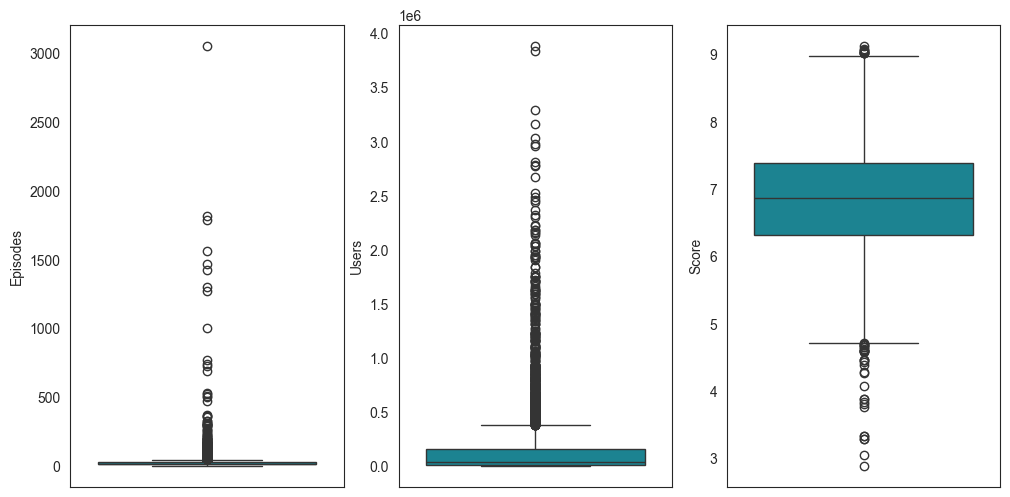

In [86]:
# Create figure
fig, ax = plt.subplots(1, 3, figsize=(12, 6))

# Plots
sns.boxplot(data=data_modified['Episodes'], color='#0892A5', ax=ax[0])
sns.boxplot(data=data_modified['Users'], color='#0892A5', ax=ax[1])
sns.boxplot(data=data_modified['Score'], color='#0892A5', ax=ax[2])

plt.show()

### It seems like we have a few outliers in both the "Episodes" and "Users" column, let's check that out.

In [87]:
data_modified[data_modified['Episodes'] >= 900].sort_values('Episodes')

,Title,Emition_Date,Launch_Year,Launch_Month,End_Year,End_Month,Episodes,Users,Score
Rank,,,,,,,,,
4393,Sekai Monoshiri Ryoko,Oct 1971 - Dec 1974,1971,Oct,1974,Dec,1006,786,5.63
4424,Monoshiri Daigaku: Ashita no Calendar,Jul 1966 - Aug 1970,1966,Jul,1970,Aug,1274,793,5.58
4286,Kirin Ashita no Calendar,Jan 1980 - Oct 1984,1980,Jan,1984,Oct,1306,607,5.77
4279,Hokahoka Kazoku,Oct 1976 - Mar 1982,1976,Oct,1982,Mar,1428,892,5.78
3767,Manga Nippon Mukashibanashi (1976),Jan 1976 - Sep 1994,1976,Jan,1994,Sep,1471,1598,6.18
4443,Kirin Monoshiri Yakata,Jan 1975 - Dec 1979,1975,Jan,1979,Dec,1565,763,5.54
541,Doraemon (1979),Apr 1979 - Mar 2005,1979,Apr,2005,Mar,1787,62159,7.82
4512,Oyako Club,Oct 1994 - Mar 2013,1994,Oct,2013,Mar,1818,1125,5.42
3941,Lan Mao,Oct 1999 - Aug 2001,1999,Oct,2001,Aug,3057,850,6.05


### By doing a quick search I found out that the highest one, "Lan Mao", is actually still airing and our date is not right, which explains the amount of episodes it has, but it also means that our data is not _entirely_ truthful, so we'll keep that in mind moving forward.
### With that being said, the amount of episodes are correct, it appears that these titles are made for kids and streamed on TV, hence the longevity.

In [88]:
data_modified[data_modified['Users'] > 3_000_000].sort_values('Users')

,Title,Emition_Date,Launch_Year,Launch_Month,End_Year,End_Month,Episodes,Users,Score
Rank,,,,,,,,,
1628,Sword Art Online,Jul 2012 - Dec 2012,2012,Jul,2012,Dec,25,3036546,7.20
93,One Punch Man,Oct 2015 - Dec 2015,2015,Oct,2015,Dec,12,3169819,8.50
2,Fullmetal Alchemist: Brotherhood,Apr 2009 - Jul 2010,2009,Apr,2010,Jul,64,3294991,9.09
65,Death Note,Oct 2006 - Jun 2007,2006,Oct,2007,Jun,37,3845470,8.62
80,Shingeki no Kyojin,Apr 2013 - Sep 2013,2013,Apr,2013,Sep,25,3887134,8.54


### There's not much to explain, the names of each speak for themselves ("Rank" is based off of "Score").

# Data Exploration/Poke Around

In [89]:
# Group data by year
anime_by_year = data_modified.groupby('Launch_Year')['Title'].agg(Count='count').reset_index()

# Group data by month
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
anime_by_month = data_modified.groupby('Launch_Month')['Title'].agg(Count='count').reset_index()
anime_by_month['Launch_Month'] = pd.Categorical(anime_by_month['Launch_Month'], categories=order)
anime_by_month = anime_by_month.sort_values('Launch_Month')

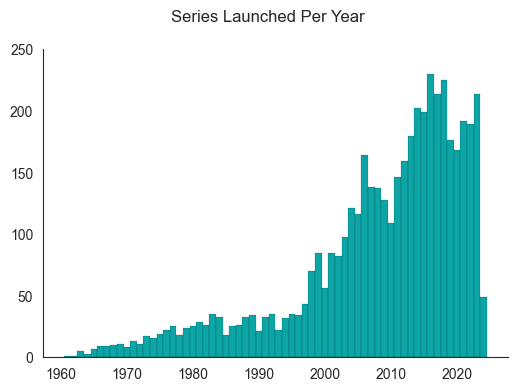

In [90]:
# Create canvas
fig, ax = plt.subplots(figsize=(6, 4))

# 1 row 1 column figure
ax.bar(anime_by_year['Launch_Year'], anime_by_year['Count'], width=1, edgecolor='black', linewidth=0.1, color='#0CA4A5')

# Customize
ax.spines[['top', 'right']].set_visible(False)
ax.set_ylim(0, 250)

fig.suptitle('Series Launched Per Year')

plt.show()

### A discernible increase on titles emerges when examining the launch dates. Initially, anime didn't enjoy widespread popularity from 1960 to 1970, it did grow from the 1970s to the 1980s. but not by much. However, what it did not do is stop, the numbers kept going up as more studios started to be intrigued by this new topic. The numbers were steady from that point on up until the lates 1990s, where they almost -and then did- doubled past numbers, transforming the previously stable launch rate into a steadily rising phenomenon that we enjoy today.

### Let's see which titles were part of that.

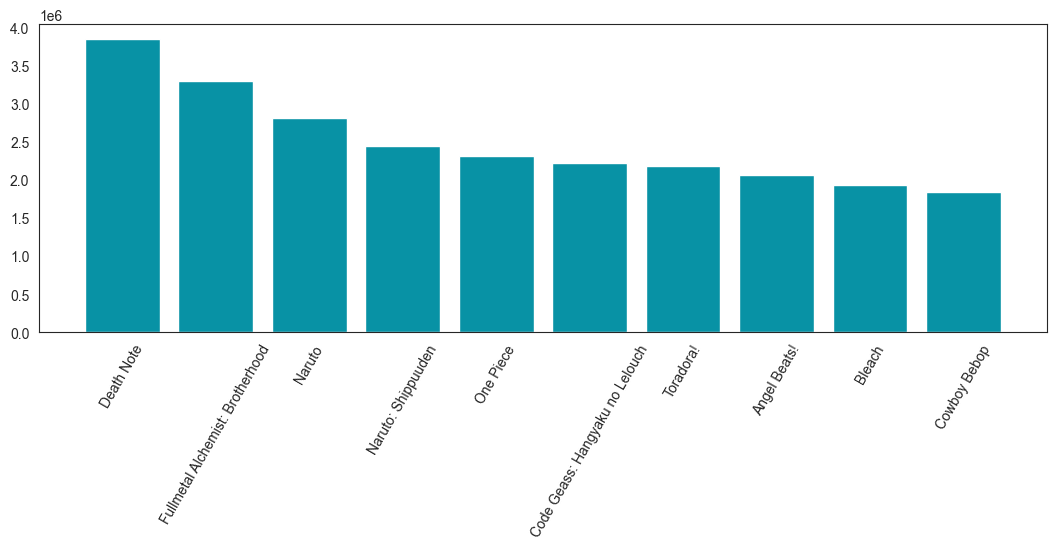

In [91]:
data = data_modified.loc[data_modified['Launch_Year'].between(1995, 2010), ['Title', 'Launch_Year', 'Users', 'Score']].sort_values('Users', ascending=False).head(10)

# Create figure
fig, ax = plt.subplots(figsize=(13, 4))

ax.bar(data['Title'], data['Users'], color='#0892A5')

# Customize
plt.xticks(rotation=60)

plt.show()

### The reason is now evident; the period between 1995 and 2005 marked the emergence of exceptional animes that have maintained their popularity to this day. This era notably introduced what the majority of the community recognizes as "The Big Three" - Naruto, One Piece, and Bleach. It comes as no surprise that the number of anime series launched experienced a significant surge during and after this timeframe.

### Let's see how the launches have been doing this past decade.

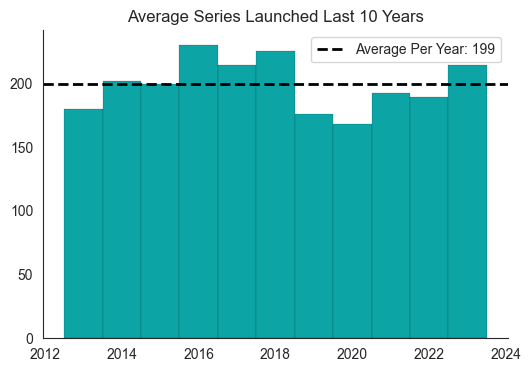

In [92]:
# Filter data by year
filtered_series = anime_by_year[anime_by_year['Launch_Year'].between(2013, 2023)]

# Average of the "Count" column
avg = np.mean(filtered_series['Count'])

# Create bar
plt.figure(figsize=(6, 4))
plt.bar(filtered_series['Launch_Year'], filtered_series['Count'], width=1, edgecolor='black', linewidth=0.1, color='#0CA4A5')

# Add line for the average
plt.axhline(avg, color='black', linewidth=2, linestyle='dashed', label=f'Average Per Year: {int(avg)}')

# Customize
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()
plt.title('Average Series Launched Last 10 Years')

plt.show()

### Now the overall distribution per month.

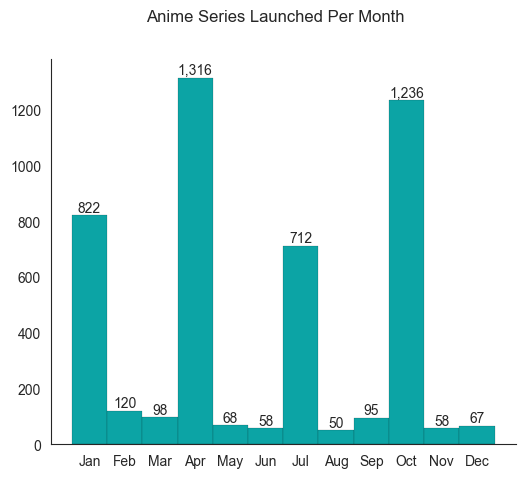

In [93]:
# Create figure
fig, ax = plt.subplots(figsize=(6, 5))

# 1 row 2 column figure
ax.bar(anime_by_month['Launch_Month'], anime_by_month['Count'], width=1, edgecolor='black', linewidth=0.1, color='#0CA4A5')

# Customize
plt.suptitle('Anime Series Launched Per Month')

ax.spines[['top', 'right']].set_visible(False)

for index, value in enumerate(anime_by_month['Count']):
    ax.text(index, value + 0.5, f'{value:,}', ha='center', va='bottom')
    
plt.show()

### The chart unmistakably reveals a recurring pattern: anime studios exhibit a tendency to launch their productions every three months, starting from January. However, a fascinating observation emerges when comparing the numbers between January and July, as well as between April and October—they share almost identical counts. This prompts the question: What could be the driving force behind this phenomenon? While one might attribute it to the changing seasons, it's noteworthy that January and July, as well as April and October, don't correspond to the same seasons. Perhaps the actual pattern unfolds every six months, and not our initial assumption of a three-month cycle.

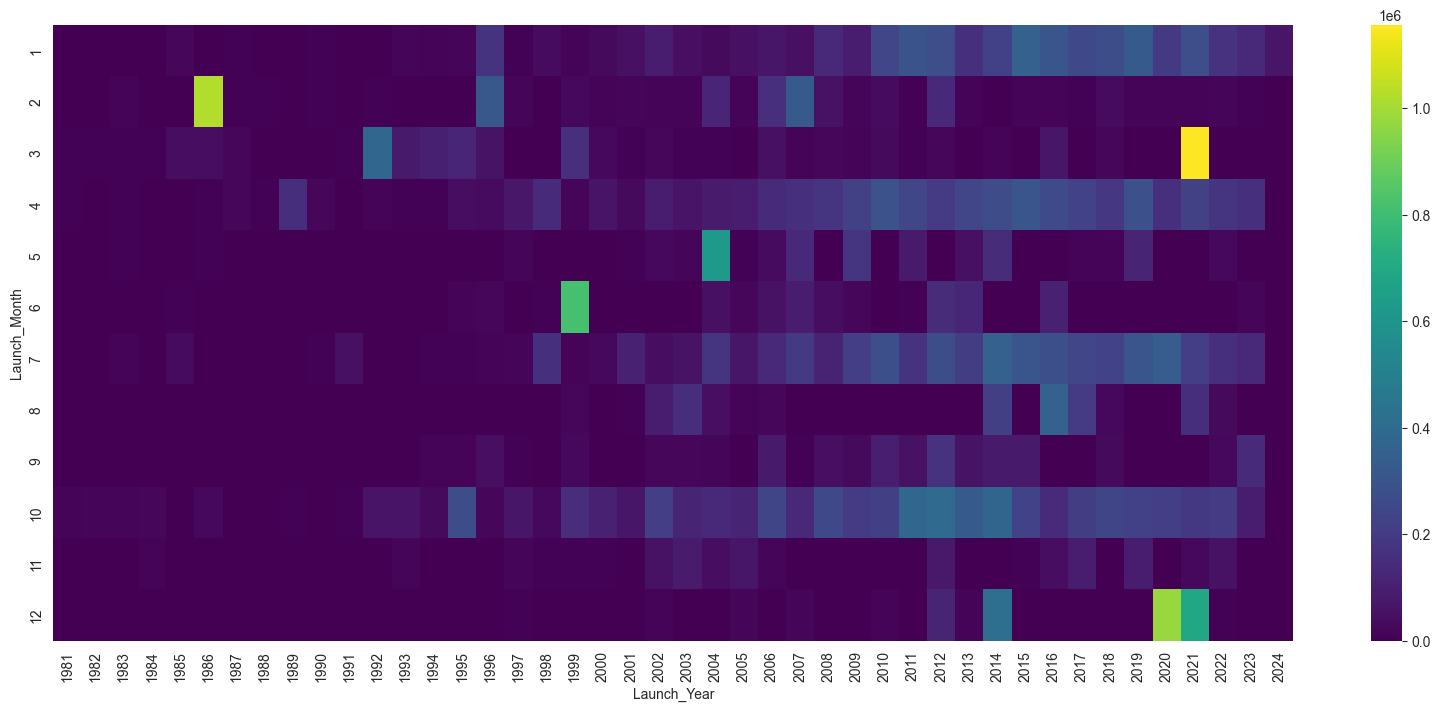

In [94]:
data_copy = data_modified.copy()
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
data_copy['Launch_Month'] =  data_copy['Launch_Month'].map(month_mapping)

pivot_data = data_copy[data_copy['Launch_Year'] > 1980].pivot_table(index='Launch_Month', columns='Launch_Year', values='Users')
pivot_data = pivot_data.fillna(0)

plt.figure(figsize=(20, 8))
sns.heatmap(pivot_data, cmap='viridis')

plt.show()

### Interesting enough, our heatmap suggests a potential correlation between anime titles trending and peak release months traditionally favored by studios. This apparent pattern raises a good question: Does this reflect inherent quality differences in titles released during these specific months, or does the timing itself contribute to their success?

### Additionally, it's worth considering that the concentration of releases during the same period might also influence viewership. In other words, it might not be that these titles inherently perform exceptionally well, but rather that their collective presence during a specific timeframe contributes to their overall success as a group (month).

### We've witnessed substantial growth in the number of titles over the years and observed that many older titles continue to command a significant viewership. However, we've seen titles that have a lot of users/viewers, but at the same time are so far in the ranks that seems odd, so it begs the question: Is there a discernible connection between the year of release and the scores these titles receive? Are contemporary titles achieving higher scores compared to those released in the past?

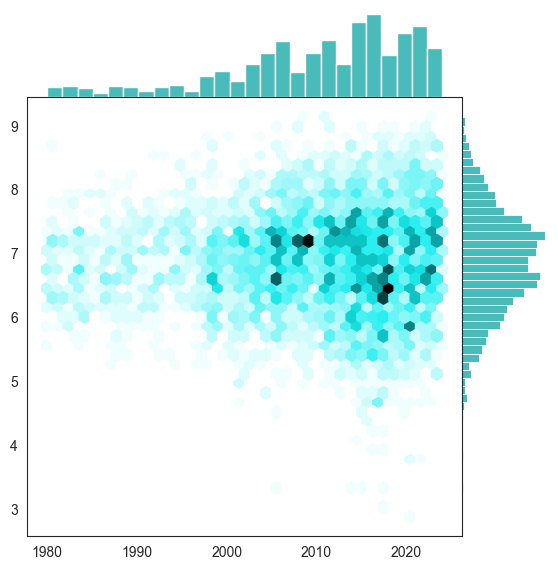

In [95]:
# Group data
grouped_data = data_modified[data_modified['Launch_Year'] >= 1980].groupby(['Title', 'Launch_Year', 'Score'])['Users'].sum().reset_index()

# Plot
sns.set_style('white')
jp = sns.jointplot(data=grouped_data, x='Launch_Year', y='Score', kind='hex', color='#0CA4A5', space=0)

# Customize
jp.ax_joint.set_ylabel("")
jp.ax_joint.set_xlabel("")

plt.show()

### Anime titles released in 2005 and earlier show a not so impressive score of 6 and above, however, it remains almost the same in more recent years, we observe how clustered the points are on both sides of the 7 mark, both positively and negatively. Still, it's crucial to acknowledge that this shift may be influenced by the sheer volume of titles released in recent years, introducing potential unfairness on the results. To address this, we'll examine the record count for each decade and extract random samples to ensure a representative analysis.

C:\Users\Biinshy\AppData\Local\Temp\ipykernel_5924\1805462089.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sns.violinplot(x='Decade', y='Score', data=data_by_decade.groupby('Decade').apply(lambda x: x.sample(150)),
C:\Users\Biinshy\AppData\Local\Temp\ipykernel_5924\1805462089.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sns.violinplot(x='Decade', y='Score', data=data_by_decade.groupby('Decad

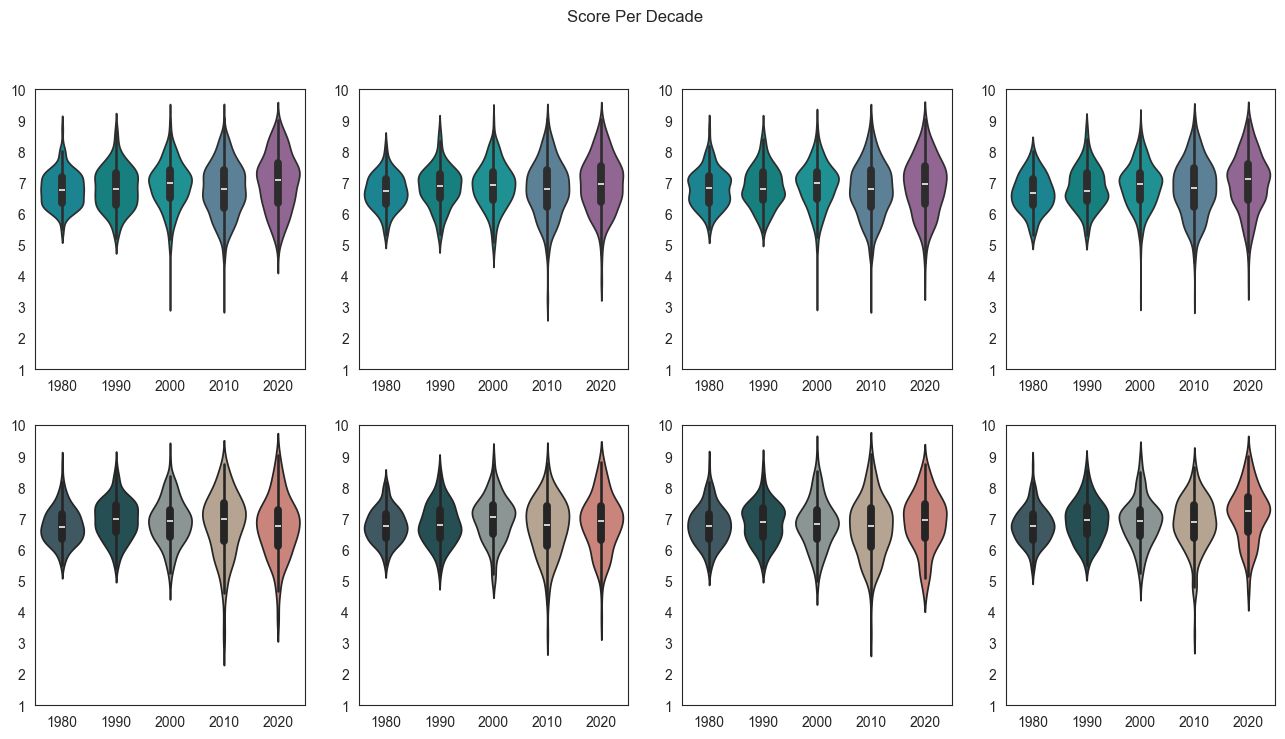

In [96]:
# Copy of the dataset
data_by_decade = data_modified[data_modified['Launch_Year'] >= 1980].copy()

# Set decades
data_by_decade['Decade'] = (data_by_decade['Launch_Year'] // 10) * 10

# Take strata
strata = data_by_decade['Decade'].unique()

# Strata proportion
strata_proportions = data_by_decade['Decade'].value_counts(normalize=True)

# Samples per decade
samples_per_decade = 150

# Sample size
sample_sizes = (strata_proportions * samples_per_decade).round().astype(int)

# Take sample
sample_proportionate = data_by_decade.groupby('Decade').sample(frac=strata_proportions[2010])
# sample_disproportionate = data_by_decade.groupby('Decade').apply(lambda x: x.sample(25))

# Create figure
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
palette = ['#0892A5', '#06908F', '#0CA4A5', '#52829F', '#985F99']
palette2 = ["#395b67","#1e555c","#899795","#bba48c","#d67b6f"]

sns.violinplot(x='Decade', y='Score', data=data_by_decade.groupby('Decade').sample(frac=strata_proportions[2010]),
               hue='Decade', palette=palette, legend=False, ax=axs[0, 0])
sns.violinplot(x='Decade', y='Score', data=data_by_decade.groupby('Decade').apply(lambda x: x.sample(150)), 
               hue='Decade', palette=palette2, legend=False, ax=axs[1, 0])

sns.violinplot(x='Decade', y='Score', data=data_by_decade.groupby('Decade').sample(frac=strata_proportions[2010]),
               hue='Decade', palette=palette, legend=False, ax=axs[0, 1])
sns.violinplot(x='Decade', y='Score', data=data_by_decade.groupby('Decade').apply(lambda x: x.sample(150)),
               hue='Decade', palette=palette2, legend=False, ax=axs[1, 1])

sns.violinplot(x='Decade', y='Score', data=data_by_decade.groupby('Decade').sample(frac=strata_proportions[2010]),
               hue='Decade', palette=palette, legend=False, ax=axs[0, 2])
sns.violinplot(x='Decade', y='Score', data=data_by_decade.groupby('Decade').apply(lambda x: x.sample(150)),
               hue='Decade', palette=palette2, legend=False, ax=axs[1, 2])

sns.violinplot(x='Decade', y='Score', data=data_by_decade.groupby('Decade').sample(frac=strata_proportions[2010]),
               hue='Decade', palette=palette, legend=False, ax=axs[0, 3])
sns.violinplot(x='Decade', y='Score', data=data_by_decade.groupby('Decade').apply(lambda x: x.sample(150)),
               hue='Decade', palette=palette2, legend=False, ax=axs[1, 3])

# Customize
for row in axs:
    for ax in row:
        ax.set_xlabel("")
        ax.set_ylim(1, 10)
        ax.set_ylabel("")

plt.suptitle('Score Per Decade')

# axs[0].set_title('Proportionate (by rate)')
# axs[1].set_title('50 Titles Per Decade')

plt.show()

### Initially, concerns about bias arose as modern years showed a greater volume of data compared to their predecessors, as we mentioned before, potentially skewing results in their favor and hindering an accurate representation. However, employing two types of sampling—proportionate (%/total) and disproportionate (150/decade)—yielded consistent outcomes. Consequently, we can confidently assert that, since the 1980s, there has been no discernible change in scores; contemporary titles continue to perform on par with their predecessors with a consistent median score of 7 from decade to decade, with occasional exceptions of lower-scoring titles that appear more frequentely in modern years. It's also worth noting that the commendable feat of consistently high scores for older titles stands as a noteworthy achievement in itself.

# Conclusion

### Undoubtedly, anime and related themes have firmly established their dominance in the realm of streaming media. What was once a subject of ridicule or mockery in the past has evolved into an inclusive and enjoyable experience that nearly everyone can embrace. The diversity and richness of content available for exploration have expanded significantly, as evidenced by the great titles we've encountered, such as Shingeki no Kyojin, Damon Slayer and Jujutsu Kaisen, to mention a few.

### Over the last decade, the emergence of exceptional titles has been noteworthy. Each passing day introduces new gems, initially presented as manga or manhwa, that later transform into captivating video titles. This continuous rush of creative narratives has the power to captivate fresh audiences, drawing them into this enchanting world. For many, anime has been a companion through growth, a source of learning, and a comforting space-an experience that is both entertaining and emotionally resonant, fostering a love for the art of animation.

### The trajectory of anime is one of continuous growth; we anticipate the arrival of new, outstanding titles, and as is customary, a fresh wave of fans will undoubtedly join this vibrant and ever-expanding community. The journey of anime's evolution is far from over, promising an exciting future for both seasoned enthusiasts and those yet to embark on this captivating journey.